In [2]:
from selenium import webdriver # 웹드라이버 import
import time

In [3]:
driver = webdriver.Chrome('C:/Users/seil3/Desktop/py_data/driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do") #접속

In [4]:
#구 목록
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")
#gu_list

In [5]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [6]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[1])

In [7]:
#조회
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [8]:
#25개 구 주유소 데이터 다운로드
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0") #구 이름
    element.send_keys(gu) #전송
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]""" 
    element_sel_gu = driver.find_element_by_xpath(xpath).click() #조회
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click() # 다운
    
    time.sleep(1)

KeyboardInterrupt: 

In [9]:
#구별 주유 가격에 대한 데이터의 정리
import pandas as pd
from glob import glob #파일 경로 등을 쉽게 접근할 수 있게 해주는 모듈

In [10]:
glob('C:/Users/seil3/Downloads/지역*.xls')

['C:/Users/seil3/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(

In [11]:
stations_files = glob('C:/Users/seil3/Downloads/지역*.xls')
stations_files

['C:/Users/seil3/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/seil3/Downloads\\지역_위치별(

In [12]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [13]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 41
Data columns (total 10 columns):
지역       523 non-null object
상호       523 non-null object
주소       523 non-null object
상표       523 non-null object
전화번호     523 non-null object
셀프여부     523 non-null object
고급휘발유    523 non-null object
휘발유      523 non-null object
경유       523 non-null object
실내등유     523 non-null object
dtypes: object(10)
memory usage: 44.9+ KB


In [14]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1627,1425,-
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1898,1629,1439,1050
2,서울특별시,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1638,1443,1047
3,서울특별시,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),SK에너지,02-487-2030,Y,1858,1658,1458,1179
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1658,1468,990


In [15]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1627,N,현대오일뱅크
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1629,N,GS칼텍스
2,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),1638,N,SK에너지
3,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1658,Y,SK에너지
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1658,Y,SK에너지


In [16]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']] #주소 분리, 구만 추출
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1627,N,현대오일뱅크,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1629,N,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),1638,N,SK에너지,강동구
3,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1658,Y,SK에너지,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1658,Y,SK에너지,강동구


In [18]:
stations['구'].unique() #서울특별시 & 특별시가 추출되었음

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [19]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구
13,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1764,N,SK에너지,서울특별시


In [20]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [21]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구
10,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1594,Y,S-OIL,특별시


In [23]:
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [25]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구


In [26]:
stations = stations[stations['가격'] != '-'] # 가격 미기입 주유소 제외
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1627,N,현대오일뱅크,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1629,N,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),1638,N,SK에너지,강동구
3,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1658,Y,SK에너지,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1658,Y,SK에너지,강동구


In [27]:
stations['가격'] = [float(value) for value in stations['가격']] #가격 정보를 float형으로 형변환

In [28]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1627.0,N,현대오일뱅크,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1629.0,N,GS칼텍스,강동구
2,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),1638.0,N,SK에너지,강동구
3,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1658.0,Y,SK에너지,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1658.0,Y,SK에너지,강동구
5,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1658.0,N,GS칼텍스,강동구
6,광성주유소,서울 강동구 올림픽로 673 (천호동),1658.0,N,S-OIL,강동구
7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1668.0,Y,SK에너지,강동구
8,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1668.0,Y,GS칼텍스,강동구
9,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1668.0,Y,SK에너지,강동구


In [30]:
stations.reset_index(inplace=True) #인덱스 리셋
#stations
del stations['index']

In [31]:
stations

,level_0,Oil_store,주소,가격,셀프,상표,구
0,0,구천면주유소,서울 강동구 구천면로 357 (암사동),1627.0,N,현대오일뱅크,강동구
1,1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1629.0,N,GS칼텍스,강동구
2,2,주)지유에너지직영 오렌지주유소,서울특별시 강동구 성안로 102 (성내동),1638.0,N,SK에너지,강동구
3,3,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1658.0,Y,SK에너지,강동구
4,4,방아다리주유소,서울 강동구 동남로 811 (명일동),1658.0,Y,SK에너지,강동구
5,5,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1658.0,N,GS칼텍스,강동구
6,6,광성주유소,서울 강동구 올림픽로 673 (천호동),1658.0,N,S-OIL,강동구
7,7,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1668.0,Y,SK에너지,강동구
8,8,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1668.0,Y,GS칼텍스,강동구
9,9,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1668.0,Y,SK에너지,강동구


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Error: Unknown system') 

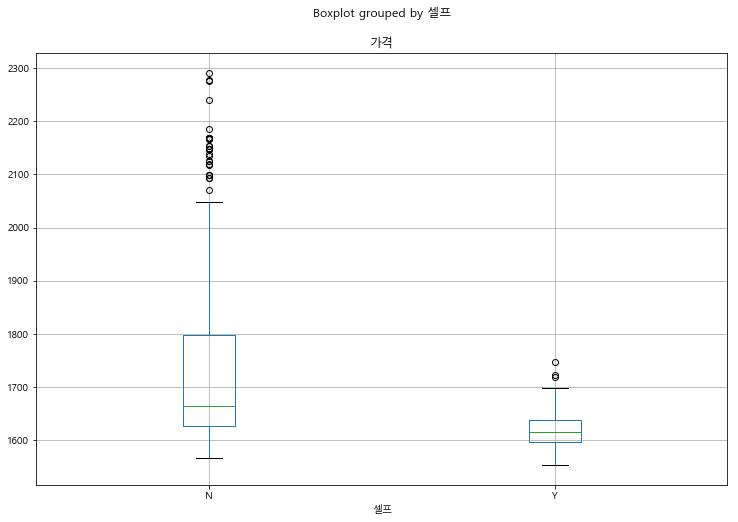

In [33]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

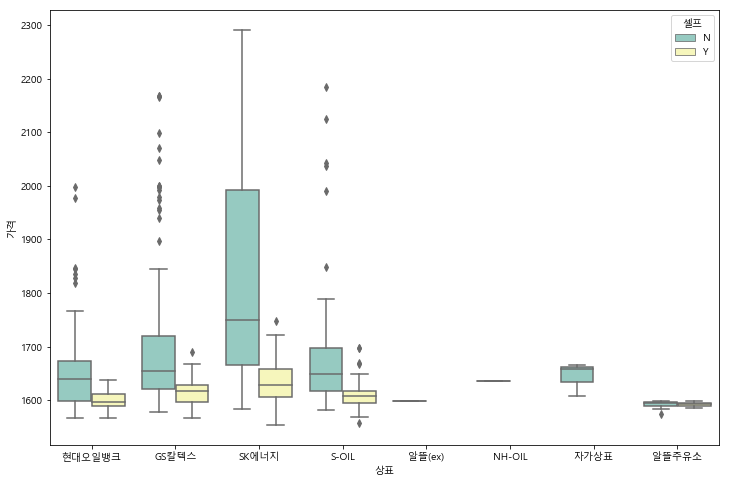

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3") #seaborn
plt.show()

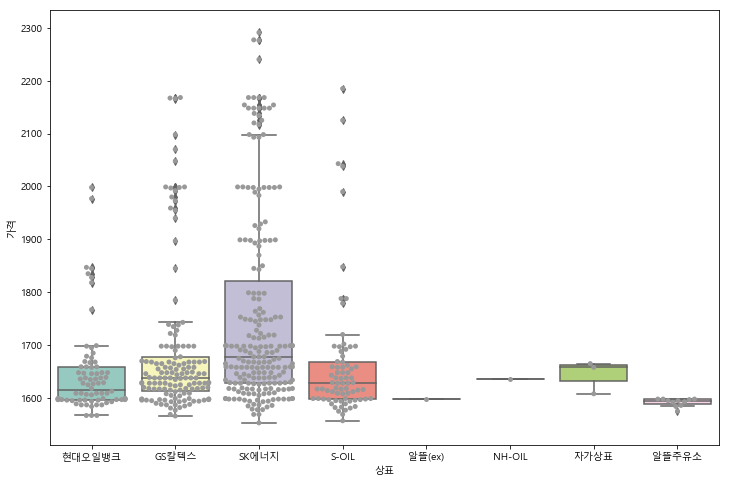

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

In [36]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [37]:
stations.sort_values(by='가격', ascending=False).head(10)

,level_0,Oil_store,주소,가격,셀프,상표,구
313,313,서남주유소,서울 중구 통일로 30 (봉래동1가),2291.0,N,SK에너지,중구
312,312,장충주유소,서울 중구 장충단로 202 (장충동1가),2277.0,N,SK에너지,중구
119,119,양재주유소,서울 서초구 바우뫼로 178 (양재동),2276.0,N,SK에너지,서초구
512,512,뉴서울(강남),서울 강남구 언주로 716 (논현동),2240.0,N,SK에너지,강남구
160,160,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2185.0,N,S-OIL,성북구
273,273,한남지점,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
311,311,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),2168.0,N,SK에너지,중구
300,300,(주)대양씨앤씨,서울 종로구 사직로 65 (사직동),2168.0,N,GS칼텍스,종로구
301,301,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),2168.0,N,SK에너지,종로구
274,274,에너비스,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구


In [38]:
stations.sort_values(by='가격', ascending=True).head(10)

,level_0,Oil_store,주소,가격,셀프,상표,구
331,331,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1553.0,Y,SK에너지,강서구
248,248,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1557.0,Y,S-OIL,강북구
249,249,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566.0,Y,GS칼텍스,강북구
275,275,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1567.0,Y,현대오일뱅크,은평구
452,452,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1567.0,N,현대오일뱅크,도봉구
453,453,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1567.0,N,현대오일뱅크,도봉구
455,455,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),1569.0,Y,S-OIL,도봉구
276,276,타이거주유소,서울 은평구 수색로 188 (증산동),1569.0,Y,SK에너지,은평구
454,454,도봉주유소,서울 도봉구 도봉로 895 (도봉동),1569.0,Y,GS칼텍스,도봉구
456,456,SK네트웍스(주)도봉행복주유소,서울특별시 도봉구 도봉로 941 (도봉동),1569.0,Y,SK에너지,도봉구


In [39]:
#pivot플롯 이용 인덱스 ="구", 가격 = 평균
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1834.166667
강동구,1703.647059
강북구,1590.750000
강서구,1653.852941
관악구,1651.277778


In [40]:
geo_path = 'C:/Users/seil3/Desktop/py_data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

In [41]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,level_0,Oil_store,주소,가격,셀프,상표,구
313,313,서남주유소,서울 중구 통일로 30 (봉래동1가),2291.0,N,SK에너지,중구
312,312,장충주유소,서울 중구 장충단로 202 (장충동1가),2277.0,N,SK에너지,중구
119,119,양재주유소,서울 서초구 바우뫼로 178 (양재동),2276.0,N,SK에너지,서초구
512,512,뉴서울(강남),서울 강남구 언주로 716 (논현동),2240.0,N,SK에너지,강남구
160,160,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2185.0,N,S-OIL,성북구
273,273,한남지점,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
311,311,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),2168.0,N,SK에너지,중구
300,300,(주)대양씨앤씨,서울 종로구 사직로 65 (사직동),2168.0,N,GS칼텍스,종로구
301,301,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),2168.0,N,SK에너지,종로구
274,274,에너비스,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구


In [42]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,level_0,Oil_store,주소,가격,셀프,상표,구
331,331,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1553.0,Y,SK에너지,강서구
248,248,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1557.0,Y,S-OIL,강북구
249,249,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566.0,Y,GS칼텍스,강북구
275,275,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1567.0,Y,현대오일뱅크,은평구
452,452,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1567.0,N,현대오일뱅크,도봉구
453,453,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1567.0,N,현대오일뱅크,도봉구
455,455,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),1569.0,Y,S-OIL,도봉구
276,276,타이거주유소,서울 은평구 수색로 188 (증산동),1569.0,Y,SK에너지,은평구
454,454,도봉주유소,서울 도봉구 도봉로 895 (도봉동),1569.0,Y,GS칼텍스,도봉구
456,456,SK네트웍스(주)도봉행복주유소,서울특별시 도봉구 도봉로 941 (도봉동),1569.0,Y,SK에너지,도봉구


In [43]:
gmap_key = "구글맵 키 입력"
gmaps = googlemaps.Client(key=gmap_key)

In [44]:
#상위 10개 좌표
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,level_0,Oil_store,주소,가격,셀프,상표,구,lat,lng
313,313,서남주유소,서울 중구 통일로 30 (봉래동1가),2291.0,N,SK에너지,중구,37.558348,126.972090
312,312,장충주유소,서울 중구 장충단로 202 (장충동1가),2277.0,N,SK에너지,중구,37.562719,127.007010
119,119,양재주유소,서울 서초구 바우뫼로 178 (양재동),2276.0,N,SK에너지,서초구,37.478071,127.039610
512,512,뉴서울(강남),서울 강남구 언주로 716 (논현동),2240.0,N,SK에너지,강남구,37.517636,127.035756
160,160,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2185.0,N,S-OIL,성북구,37.587908,127.005575
273,273,한남지점,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구,37.534657,127.006063
311,311,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),2168.0,N,SK에너지,중구,37.561648,126.997142
300,300,(주)대양씨앤씨,서울 종로구 사직로 65 (사직동),2168.0,N,GS칼텍스,종로구,37.574464,126.966618
301,301,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),2168.0,N,SK에너지,종로구,37.586068,127.001058
274,274,에너비스,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구,37.534657,127.006063


In [45]:
#하위 10개 좌표
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,level_0,Oil_store,주소,가격,셀프,상표,구,lat,lng
331,331,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1553.0,Y,SK에너지,강서구,37.555284,126.768567
248,248,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1557.0,Y,S-OIL,강북구,37.640155,127.017203
249,249,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1566.0,Y,GS칼텍스,강북구,37.642140,127.029568
275,275,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1567.0,Y,현대오일뱅크,은평구,37.581122,126.897774
452,452,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1567.0,N,현대오일뱅크,도봉구,37.674434,127.044051
453,453,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1567.0,N,현대오일뱅크,도봉구,37.657714,127.040569
455,455,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),1569.0,Y,S-OIL,도봉구,37.653949,127.037515
276,276,타이거주유소,서울 은평구 수색로 188 (증산동),1569.0,Y,SK에너지,은평구,37.578424,126.902050
454,454,도봉주유소,서울 도봉구 도봉로 895 (도봉동),1569.0,Y,GS칼텍스,도봉구,37.684411,127.045499
456,456,SK네트웍스(주)도봉행복주유소,서울특별시 도봉구 도봉로 941 (도봉동),1569.0,Y,SK에너지,도봉구,37.688335,127.045313


In [46]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map